<a href="https://colab.research.google.com/github/Wilbertz/TensorFlow-Developer-Certificate/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [37]:
from tensorflow.keras.datasets import boston_housing

In [38]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [39]:
print("Number if train samples: ", x_train.shape)
print("Number if test samples: ", x_test.shape)

Number if train samples:  (404, 13)
Number if test samples:  (102, 13)


In [40]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [41]:
y_train[0]

15.2

In [42]:
from sklearn.preprocessing  import MinMaxScaler

In [43]:
mms = MinMaxScaler()
mms.fit(x_train)

MinMaxScaler()

In [44]:
x_train = mms.transform(x_train)
x_test =mms.transform(x_test)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()
model.add(Dense(100, input_dim=13, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [47]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1400      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


In [49]:
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 1s 28ms/step - loss: 541.7642 - mae: 21.3326 - val_loss: 556.9018 - val_mae: 21.6774
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 454.1868 - mae: 19.0867 - val_loss: 454.3829 - val_mae: 19.0537
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 346.3654 - mae: 15.8850 - val_loss: 324.9152 - val_mae: 15.1380
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 236.4095 - mae: 12.2585 - val_loss: 210.6735 - val_mae: 11.6073
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 159.9329 - mae: 9.7856 - val_loss: 157.5567 - val_mae: 9.8775
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 129.1362 - mae: 8.7516 - val_loss: 126.5909 - val_mae: 8.7246
Epoch 7/20
11/11 [==============================] - 0s 8ms/step - loss: 109.8610 - mae: 7.9300 - val_loss: 102.8243 - val_mae: 7.7822
Epoch 8/20
11/11 [==============================] - 0

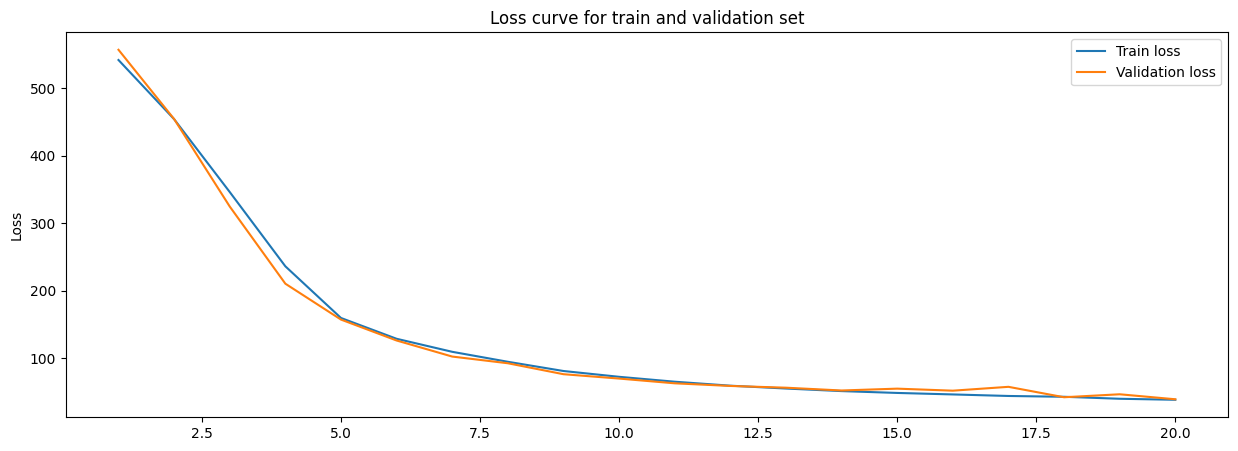

In [51]:
plt.figure(figsize=(15,5))
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.title('Loss curve for train and validation set')
#plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Validation loss'])
plt.show()

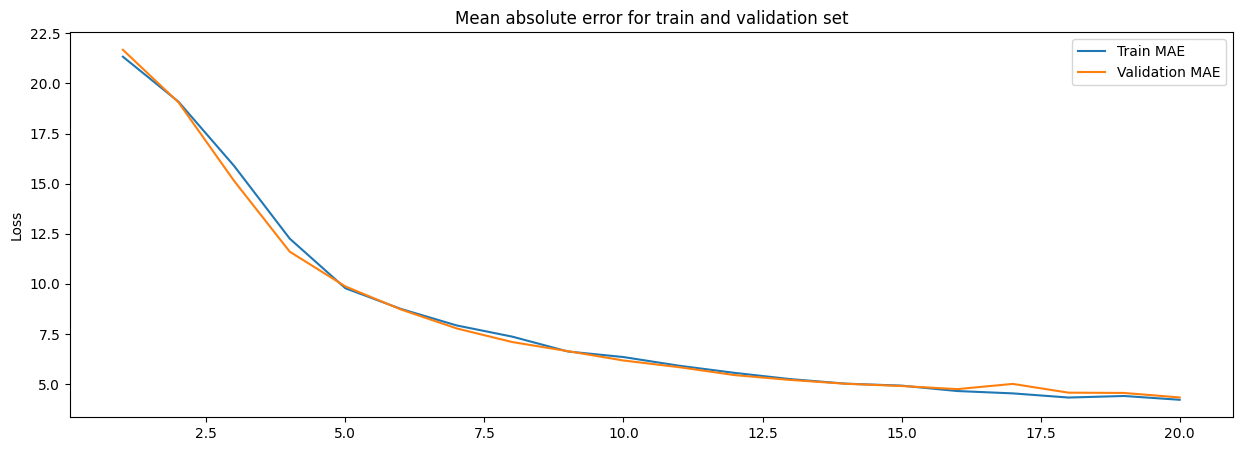

In [54]:
plt.figure(figsize=(15,5))
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.title('Mean absolute error for train and validation set')
#plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train MAE', 'Validation MAE'])
plt.show()

In [55]:
result = model.evaluate(x_test, y_test)
for i in range(len(result)):
  print(f'Test {model.metrics_names[i]} = {result[i]}')

4/4 [==============================] - 0s 5ms/step - loss: 38.5312 - mae: 4.5173
Test loss = 38.53119659423828
Test mae = 4.5172905921936035


In [56]:
from sklearn.metrics import r2_score

In [57]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [58]:
r2_score(y_test, y_pred)

0.5371286407817322